In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sub = pd.read_csv('input/sample_submission.csv')
print(train.shape, test.shape)

(4752, 60) (11520, 41)


In [2]:
X_train = train.reset_index(drop=True).loc[:, 'id':'X39'].copy()

In [3]:
# sub_train1 = sub_train1.drop(['X14', 'X16', 'X19'], axis=1)
# sub_train2 = sub_train2.drop(['X14', 'X16', 'X19'], axis=1)

def trans_time(df, start=0, end=4752):
    results = {}
    minutes = pd.Series((df.loc[start:end, 'id'] % 144).astype(int), name='Minutes')
    hours = pd.Series((df.iloc[start:end].index % 144 / 6).astype(int), name='Hours')
    results['minutes'] = minutes
    results['hours'] = hours
    
    min_in_day = 24 * 6
    hour_in_day = 24
    results['min_in_day'] = min_in_day
    results['hour_in_day'] = hour_in_day

    minute_sin = pd.Series(np.sin(np.pi*minutes / min_in_day), name='MinSin')
    minute_cos = pd.Series(np.cos(np.pi*minutes / min_in_day), name='MinCos')
    results['minute_sin'] = minute_sin
    results['minute_cos'] = minute_cos

    hour_sin  = pd.Series(np.sin(np.pi*hours / min_in_day), name='HourSin')
    hour_cos  = pd.Series(np.cos(np.pi*hours / min_in_day), name='HourCos')
    results['hour_sin'] = hour_sin
    results['hour_cos'] = hour_cos
    
    return results

In [4]:
times = trans_time(X_train)

X_train = pd.concat([
    X_train, 
    times['minutes'], 
    times['hours'], 
    times['minute_sin'], 
    times['minute_cos'],
    times['hour_sin'],
    times['hour_cos'],
], ignore_index=True, axis=1)

In [5]:
columns = ['id'] + [f'X{i:02}' for i in range(40)] + ['Minutes', 'Hours', 'MinSin', 'MinCos', 'HourSin', 'HourCos']
X_train.columns = columns

In [6]:
def same_min_max(df):
    columns = df.columns[df.max() == df.min()]
    print(columns)
    return df.drop(df.columns[df.max() != df.min()], axis=1)

X_train = X_train.drop(same_min_max(X_train), axis=1)

Index(['X14', 'X16', 'X19'], dtype='object')


In [7]:
times = trans_time(test, end=11520)

test = pd.concat([
    test, 
    times['minutes'], 
    times['hours'], 
    times['minute_sin'], 
    times['minute_cos'],
    times['hour_sin'],
    times['hour_cos'],
], ignore_index=True, axis=1)

columns = ['id'] + [f'X{i:02}' for i in range(40)] + ['Minutes', 'Hours', 'MinSin', 'MinCos', 'HourSin', 'HourCos']
print(len(columns))
test.columns = columns
test

47


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Minutes,Hours,MinSin,MinCos,HourSin,HourCos
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0,0,0,0.000000,1.000000,0.000000,1.000000
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0,1,0,0.021815,0.999762,0.000000,1.000000
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0,2,0,0.043619,0.999048,0.000000,1.000000
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0,3,0,0.065403,0.997859,0.000000,1.000000
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0,4,0,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,88.1,65.6,0.0,101.6,0.0,176.7,1.8,0.0,77.3,0.0,1005.2,1012.9,1.6,169.8,4.5,1011.5,27.7,1004.9,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5,139,23,0.108867,-0.994056,0.480989,0.876727
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,75.5,51.9,0.0,84.8,0.0,187.8,2.9,0.0,78.1,0.0,1005.2,1012.9,1.9,138.9,4.7,1011.4,27.6,1004.9,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5,140,23,0.087156,-0.996195,0.480989,0.876727
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,0.0,17.1,77.5,29.0,0.0,104.5,0.0,184.8,2.9,0.0,78.9,0.0,1005.4,1013.0,2.3,146.7,4.8,1011.4,27.5,1005.0,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5,141,23,0.065403,-0.997859,0.480989,0.876727
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,1012.6,0.0,17.1,74.1,30.0,0.0,103.0,0.0,187.8,3.4,0.0,79.7,0.0,1005.3,1013.0,1.7,146.5,3.5,1011.4,27.3,1005.0,77.3,25.3,24.2,1012.9,19.56,174.2,0.0,80.1,68.8,0.5,142,23,0.043619,-0.999048,0.480989,0.876727


In [8]:
test = test.drop(['X14', 'X16', 'X19'], axis=1)

In [9]:
X_train = X_train.drop(['id', 'X03', 'X10', 'X13', 'X21', 'X24', 'X36', 'X39'], axis=1)
test = test.drop(['id', 'X03', 'X10', 'X13', 'X21','X24', 'X36', 'X39'], axis=1)

In [10]:
# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가 
X_train = (X_train - MEAN) / (STD + 1e-07)

In [11]:
import tensorflow as tf

In [12]:
# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 
def convert_to_timeseries(df, interval):
    sequence_list = []
    target_list = []
    
    for i in range(df.shape[0] - interval):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list)
    target = np.array(target_list)
    
    return sequence, target

In [13]:
y_columns = ['Y15','Y16']

In [14]:
X_train.shape

(4752, 36)

In [15]:
# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0, 12, 36))
target = np.empty((0,))
for column in y_columns :
    
    concat = pd.concat([X_train, train[column]], axis = 1)

    _sequence, _target = convert_to_timeseries(concat.head(144*30), interval = 12)

    sequence = np.vstack((sequence, _sequence))
    target = np.hstack((target, _target))

In [16]:
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
X_train['dummy'] = 0

# train set에서 도출된 평균과 표준편차로 standardization 실시 
test = (test - MEAN) / (STD + 1e-07)

# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
test['dummy'] = 0

In [17]:
# train과 test 기간을 합쳐서 120분 간격으로 학습데이터 재구축
X_test, _ = convert_to_timeseries(pd.concat([X_train, test], axis=0), interval=12)

In [18]:
# test set 기간인 후반부 80일에 맞게 자르기 
X_test = X_test[-11520:, :, :]

In [19]:
# 만들어 두었던 dummy feature 제거
X_train.drop('dummy', axis=1, inplace=True)
test.drop('dummy', axis=1, inplace=True)

In [20]:
import keras.backend as K

# def custom_mse(y_true, y_pred):
#     diff = K.abs(y_true - y_pred)
#     less_then_one = K.less_equal(diff, 1)
#     score = K.switch(less_then_one, 0, diff)
    
# #     # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
# #     score = np.average(np.average(less_then_one ** 2, axis=0))
    
#     return K.mean(score)

Using TensorFlow backend.


In [36]:
import keras
import os
import time
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

os.environ['KERAS_BACKEND'] = 'plaidml.keras.backend'

# 간단한 lstm 모델 구축하기 
model = Sequential()
model.add(GRU(128, 
              dropout=0.1,
              input_shape=sequence.shape[-2:], return_sequences=True))
model.add(LSTM(128, dropout=0.1,))
model.add(Dense(512, 
                activation='linear'))
model.add(Dense(256, 
                activation='linear'))
model.add(Dense(128, 
                activation='linear'))
model.add(Dense(1))

model.compile(
    optimizer='rmsprop', # adam
    loss='mse',
)

In [37]:
from keras.callbacks import Callback

# loss가 4미만으로 떨어지면 학습 종료 시키는 기능
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (logs.get('loss') < 3):
            print('\n Loss is under 2.5, cancelling training')
            self.model.stop_training = True

In [38]:
callbacks = CustomCallback()

# 모델 학습
history = model.fit(    
    sequence, target,
    epochs=60, # 60
    batch_size=128,
    verbose=1,
    shuffle=True,
    validation_split=0.2,
    callbacks=[callbacks]
)

Train on 6892 samples, validate on 1724 samples
Epoch 1/60
6892/6892 [==============================] - 11s 2ms/step - loss: 63.7705 - val_loss: 14.5223
Epoch 2/60
6892/6892 [==============================] - 7s 987us/step - loss: 17.7050 - val_loss: 5.4374
Epoch 3/60
6892/6892 [==============================] - 7s 989us/step - loss: 15.5172 - val_loss: 5.5974
Epoch 4/60
6892/6892 [==============================] - 7s 995us/step - loss: 11.7255 - val_loss: 6.4814
Epoch 5/60
6892/6892 [==============================] - 7s 997us/step - loss: 10.7356 - val_loss: 3.9340
Epoch 6/60
6892/6892 [==============================] - 7s 990us/step - loss: 9.7695 - val_loss: 6.7120
Epoch 7/60
6892/6892 [==============================] - 7s 991us/step - loss: 9.0830 - val_loss: 10.1627
Epoch 8/60
6892/6892 [==============================] - 7s 989us/step - loss: 7.9867 - val_loss: 29.8931
Epoch 9/60
6892/6892 [==============================] - 7s 1ms/step - loss: 7.2670 - val_loss: 34.0045
Epoch 10/6

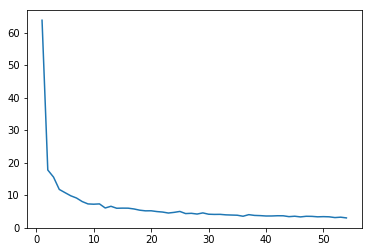

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss)
plt.show()

In [40]:
# LSTM 레이어는 고정
model.layers[0].trainable = False

# fine tuning 할 때 사용할 학습데이터 생성 (Y18)
X_finetune, y_finetune = convert_to_timeseries(
    pd.concat([
        X_train.tail(432), train['Y18'].tail(432
                                            )], axis=1), interval=12)

In [41]:
# LSTM 레이어는 고정 시켜두고, DNN 레이어에 대해서 fine tuning 진행 (Transfer Learning)
history = model.fit(
    X_finetune, 
    y_finetune,
    epochs=20,
    batch_size=64,
    shuffle=False,
    verbose=1
)

Epoch 1/20
128/420 [========>.....................] - ETA: 0s - loss: 6.7283

/Users/unerue/anaconda3/envs/kaggle/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


420/420 [==============================] - 1s 2ms/step - loss: 16.4895
Epoch 2/20
420/420 [==============================] - 1s 2ms/step - loss: 8.7247
Epoch 3/20
420/420 [==============================] - 1s 2ms/step - loss: 2.9557
Epoch 4/20
420/420 [==============================] - 1s 2ms/step - loss: 1.8089
Epoch 5/20
420/420 [==============================] - 1s 2ms/step - loss: 2.5080
Epoch 6/20
420/420 [==============================] - 1s 2ms/step - loss: 4.3256
Epoch 7/20
420/420 [==============================] - 1s 2ms/step - loss: 2.9997
Epoch 8/20
420/420 [==============================] - 1s 2ms/step - loss: 7.6787
Epoch 9/20
420/420 [==============================] - 1s 2ms/step - loss: 3.7336
Epoch 10/20
420/420 [==============================] - 1s 2ms/step - loss: 1.2982
Epoch 11/20
420/420 [==============================] - 1s 2ms/step - loss: 1.6730
Epoch 12/20
420/420 [==============================] - 1s 2ms/step - loss: 4.0654
Epoch 13/20
420/420 [==============

In [42]:
# 예측하기 
finetune_pred = model.predict(X_test)

In [43]:
# 제출 파일 만들기
sub = pd.DataFrame({
    'id': range(144*33, 144*113),
    'Y18': finetune_pred.flatten()
})

In [44]:
sub.to_csv('submission-keras.csv', index=False)

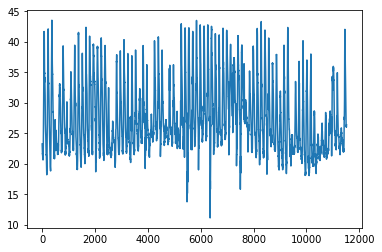

In [45]:
plt.plot(finetune_pred.flatten())
plt.show()